In [7]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
disp = pd.read_csv("data/bici_disp.csv", index_col=False, encoding = "ISO-8859-1", sep=';')

In [72]:
disp.head()

date disp_hours avg_bikes
0  10/08/2015  19.894,18    995,22
1  11/08/2015  19.817,30  1.007,57
2  12/08/2015  19.725,32  1.014,96
3  13/08/2015  19.530,97  1.001,24
4  14/08/2015  22.770,43  1.128,32

In [13]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 3 columns):
date          1386 non-null object
disp_hours    1386 non-null object
avg_bikes     1386 non-null object
dtypes: object(3)
memory usage: 32.6+ KB


In [25]:
disp = disp.drop(['HORAS_TOTALES_USOS_BICICLETAS', 'TOTAL_HORAS_SERVICIO_BICICLETAS', 'USOS_ABONADO_ANUAL',
       'USOS_ABONADO_OCASIONAL', 'TOTAL_USOS'], 1)

In [26]:
disp.columns = ['date', 'disp_hours', 'avg_bikes']

In [63]:
disp2 = disp.copy()

In [80]:
disp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1385
Data columns (total 3 columns):
date          1386 non-null datetime64[ns]
disp_hours    1386 non-null float64
avg_bikes     1386 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 43.3 KB


In [67]:
disp2['disp_hours'] = [str(i) for i in disp2.disp_hours]
disp2['disp_hours'] = disp2.disp_hours.apply(lambda v: (v.replace('.', '')))
disp2['disp_hours'] = disp2.disp_hours.apply(lambda v: float(v.replace(',', '.')))

In [64]:
disp2['avg_bikes'] = [str(i) for i in disp2.avg_bikes]
disp2['avg_bikes'] = disp2.avg_bikes.apply(lambda v: (v.replace('.', '')))
disp2['avg_bikes'] = disp2.avg_bikes.apply(lambda v: float(v.replace(',', '.')))

In [75]:
disp2[disp2['avg_bikes'].isnull()]

date  disp_hours  avg_bikes
1386  nan         NaN        NaN

In [94]:
disp.head()

date  disp_hours  avg_bikes  month
0 2015-08-10    19894.18     995.22      8
1 2015-08-11    19817.30    1007.57      8
2 2015-08-12    19725.32    1014.96      8
3 2015-08-13    19530.97    1001.24      8
4 2015-08-14    22770.43    1128.32      8

In [77]:
disp2 = disp2.drop(1386)

In [79]:
def cast_date(date):
    return datetime.strptime(date, '%d/%m/%Y')

disp2['date'] = [str(i) for i in disp2.date]
disp2['date'] = disp2.date.apply(cast_date)

In [89]:
disp = disp2[disp2['date'] <= '2018-12-31']

In [90]:
disp.tail()

date  disp_hours  avg_bikes
1235 2018-12-27    46154.69    2010.66
1236 2018-12-28    45874.27    2007.25
1237 2018-12-29    46063.56    1996.64
1238 2018-12-30    45881.63    1987.87
1239 2018-12-31    45214.57    1950.36

In [81]:
from matplotlib import rcParams
import matplotlib
%matplotlib inline
rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')
sns.set_style("darkgrid")

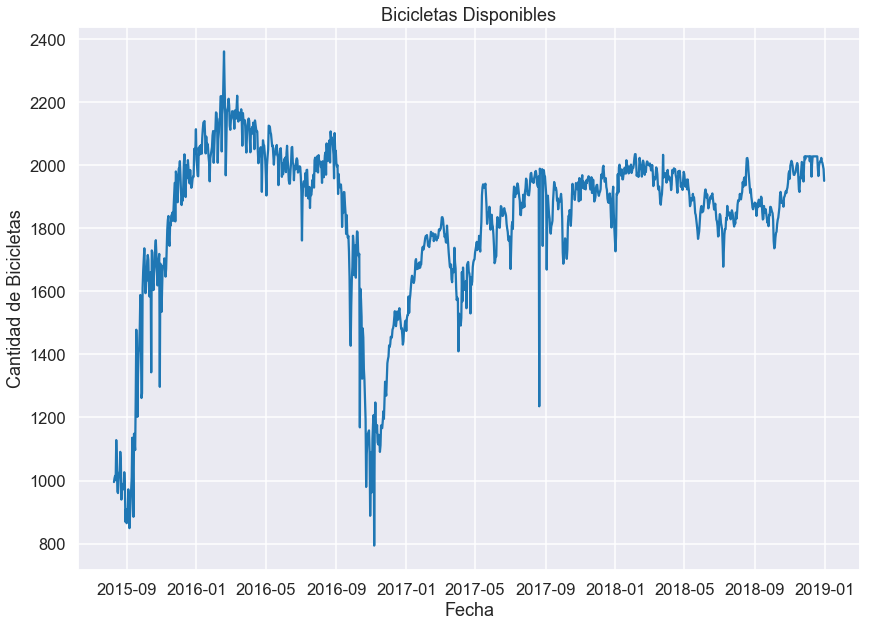

In [91]:
g = sns.lineplot(x="date", y='avg_bikes', data=disp)

plt.title('Bicicletas Disponibles')
plt.xlabel('Fecha')
plt.ylabel("Cantidad de Bicicletas")
plt.show()

In [95]:
disp['month'] = disp.apply(lambda fila: fila.date.month, axis=1)
disp['year'] = disp.apply(lambda fila: fila.date.year, axis=1)

C:\Users\alejo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alejo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


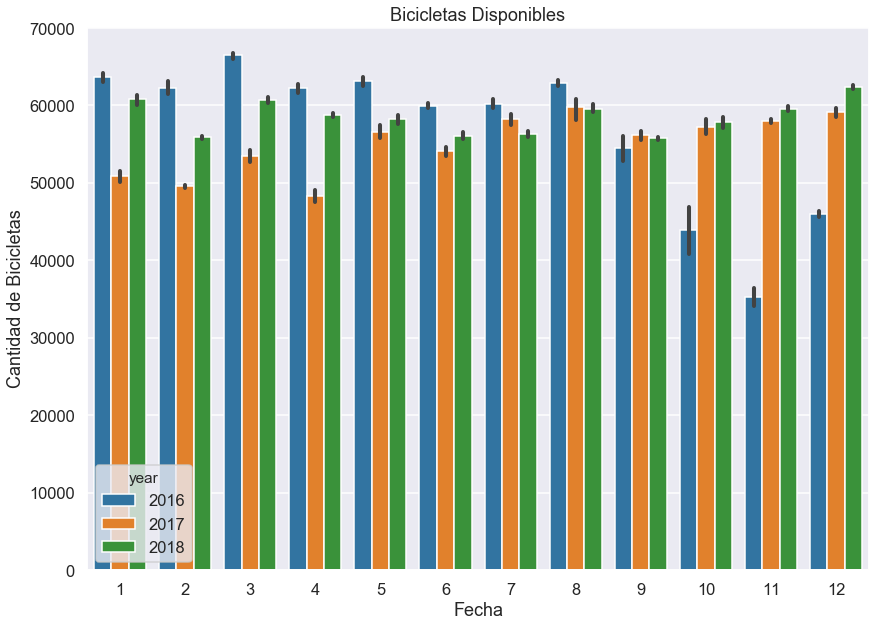

In [99]:
g = sns.barplot(x = "month", y = 'avg_bikes', hue = 'year', data = disp[disp['date'] >= '2016-01-01'], estimator=sum)

plt.title('Bicicletas Disponibles')
plt.xlabel('Fecha')
plt.ylabel("Cantidad de Bicicletas")
plt.show()

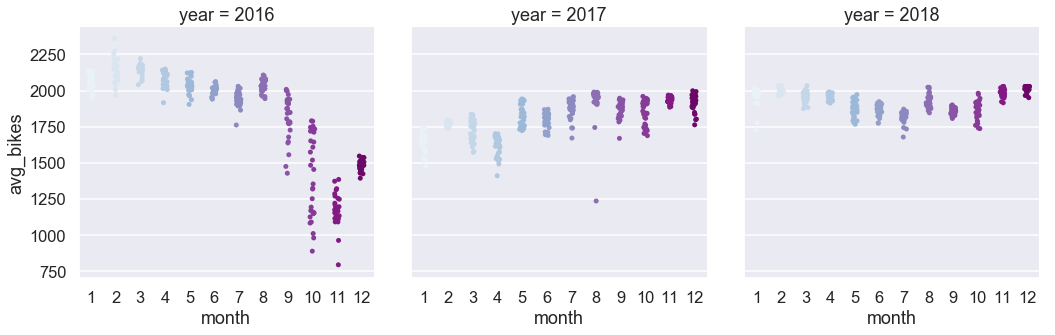

In [111]:
g = sns.catplot(x="month", y='avg_bikes', col="year",
                 data=disp[disp['date'] >= '2016-01-01'], palette='BuPu', kind="strip", margin_titles=True)

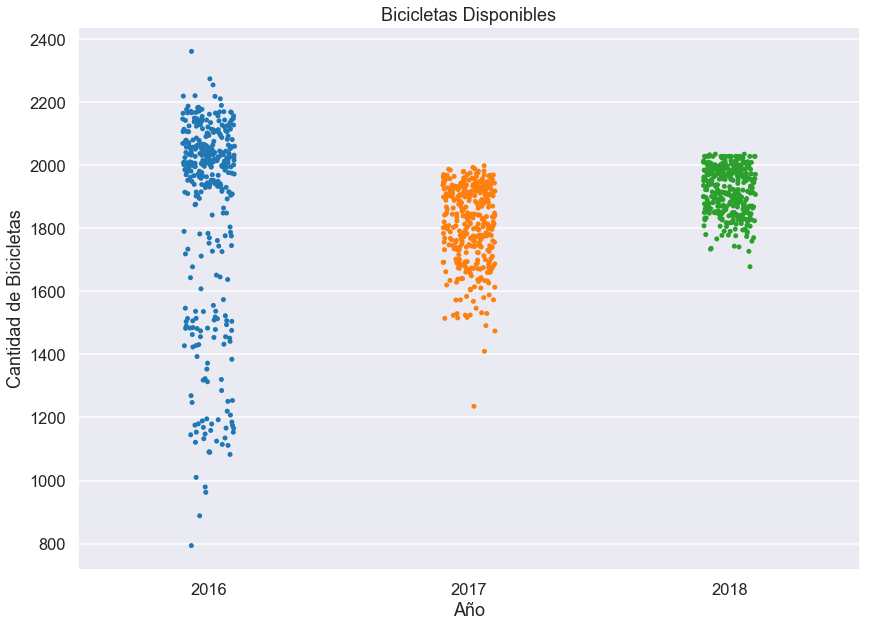

In [113]:
g = sns.boxplot(x="year", y='avg_bikes', data=disp[disp['date'] >= '2016-01-01'])

plt.title('Bicicletas Disponibles')
plt.xlabel('AÃ±o')
plt.ylabel("Cantidad de Bicicletas")
plt.show()

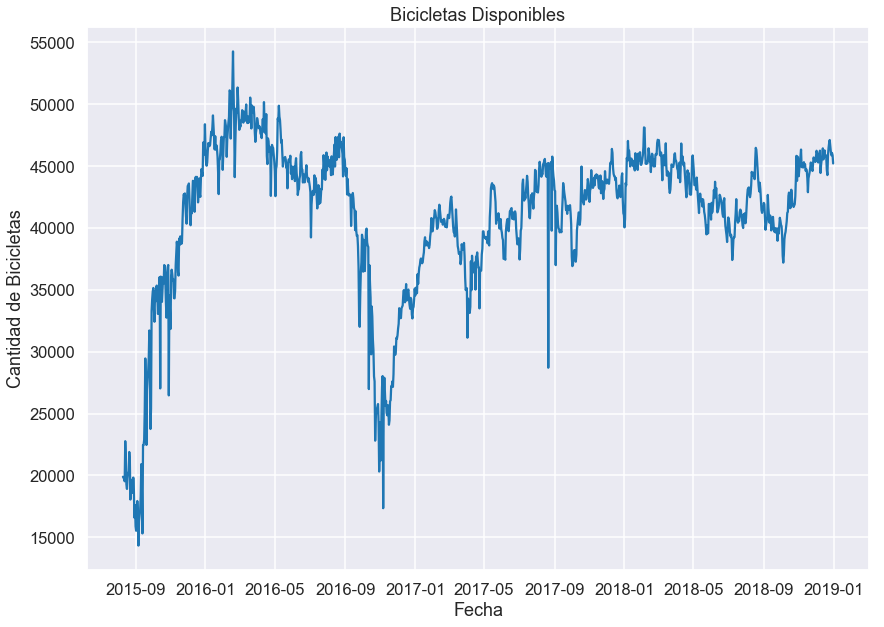

In [112]:
g = sns.lineplot(x="date", y='disp_hours', data=disp)

plt.title('Bicicletas Disponibles')
plt.xlabel('Fecha')
plt.ylabel("Cantidad de Bicicletas")
plt.show()